## <font color='red'> SML ASS 4 </font>
###  <font color='BLUE'> Kaustubh Raykar </FONT>
PRN : 21070126048   <br> AIML A3 <br> 
### <font color='green'>RIDGE AND LASSO</font>

#Importing Librarires

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Dataset

X1 Relative Compactness  
X2 Surface Area  
X3 Wall Area  
X4 Roof Area  
X5 Overall Height  
X6 Orientation  
X7 Glazing Area  
X8 Glazing Area Distribution  
y1 Heating Load  
y2 Cooling Load

In [ ]:
df = pd.read_excel('/content/ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
#renaming some columns 
df = df.rename(columns={'X1': 'Relative_Compactness', 'X2': 'Surface_Area','X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height','X6':'Orientation','X7':'Glazing_Area','X8':'Glazing_Area_Distribution','Y1':'Heating_Load','Y2':'Cooling_Load'})
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
#basic statics of the dataset
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
#checking null values in the dataset
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

#EDA

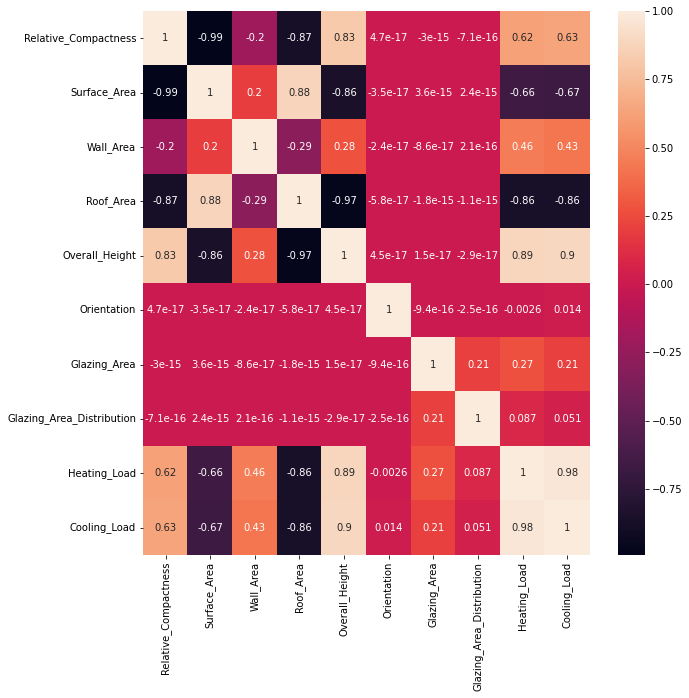

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot = True)

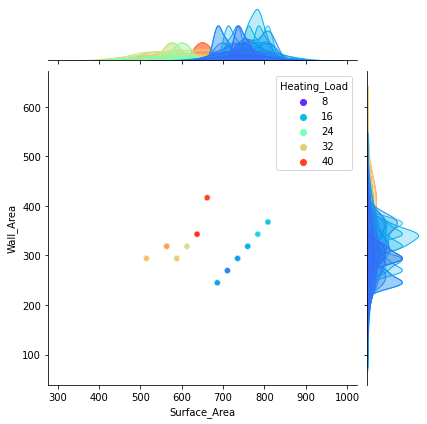

In [ ]:
sns.jointplot(data=df, x="Surface_Area", y="Wall_Area", hue="Heating_Load",palette = 'rainbow')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


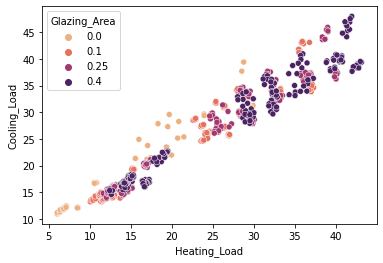

In [ ]:
sns.scatterplot(df["Heating_Load"], df["Cooling_Load"], hue=df["Glazing_Area"],palette = "flare")
plt.show()

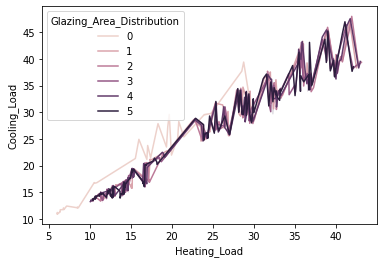

In [ ]:
sns.lineplot(data=df, x="Heating_Load", y="Cooling_Load", hue="Glazing_Area_Distribution")

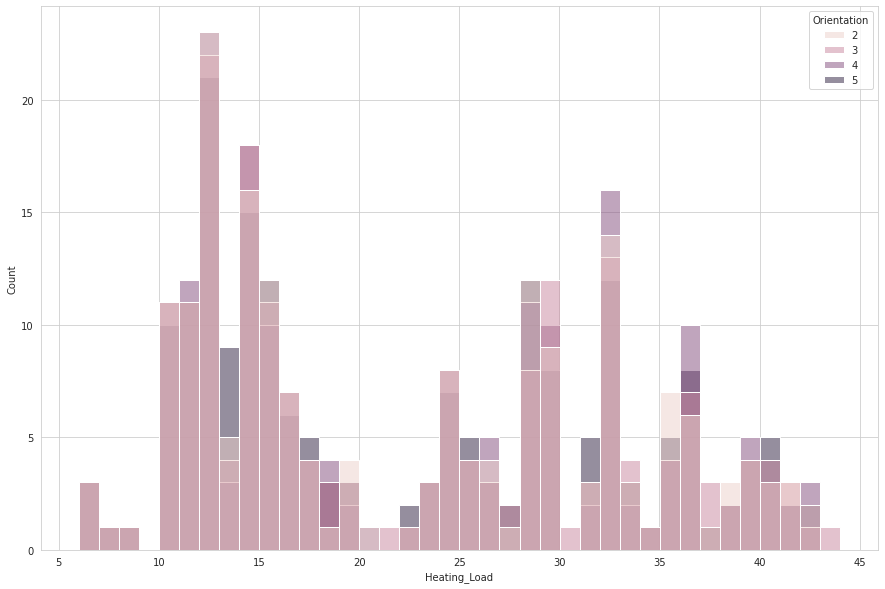

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(data=df, x="Heating_Load", binwidth=1, hue="Orientation", ax=ax)

plt.show()

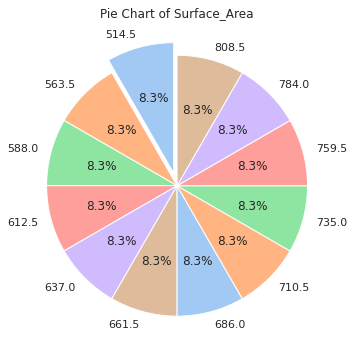

In [ ]:
# Set the column name to use for the pie chart
column_name = 'Surface_Area'

# Get the unique values in the column and count them
unique_values = df[column_name].unique()
num_slices = len(unique_values)

custom_palette = sns.color_palette('pastel', len(grouped))

fig = plt.figure(figsize=(6, 6))

# Set up the explode parameter to make each slice of the pie chart stand out
explode = np.zeros(num_slices)
explode[0] = 0.1  # the first slice is moved out by 0.1

# Create the pie chart
plt.pie(df.groupby(column_name).size(), labels=unique_values, explode=explode, autopct='%1.1f%%', startangle=90,colors=custom_palette)

# Add a title
plt.title('Pie Chart of ' + column_name)

# Show the chart
plt.show()


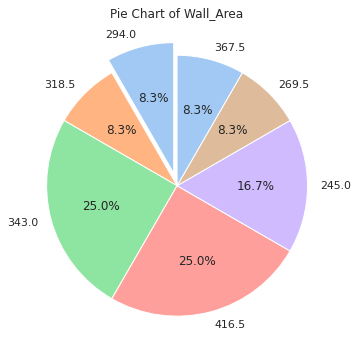

In [ ]:
# Set the column name to use for the pie chart
column_name = 'Wall_Area'

# Get the unique values in the column and count them
unique_values = df[column_name].unique()
num_slices = len(unique_values)

custom_palette = sns.color_palette('pastel', len(grouped))

fig = plt.figure(figsize=(6, 6))

# Set up the explode parameter to make each slice of the pie chart stand out
explode = np.zeros(num_slices)
explode[0] = 0.1  # the first slice is moved out by 0.1

# Create the pie chart
plt.pie(df.groupby(column_name).size(), labels=unique_values, explode=explode, autopct='%1.1f%%', startangle=90,colors=custom_palette)

# Add a title
plt.title('Pie Chart of ' + column_name)

# Show the chart
plt.show()


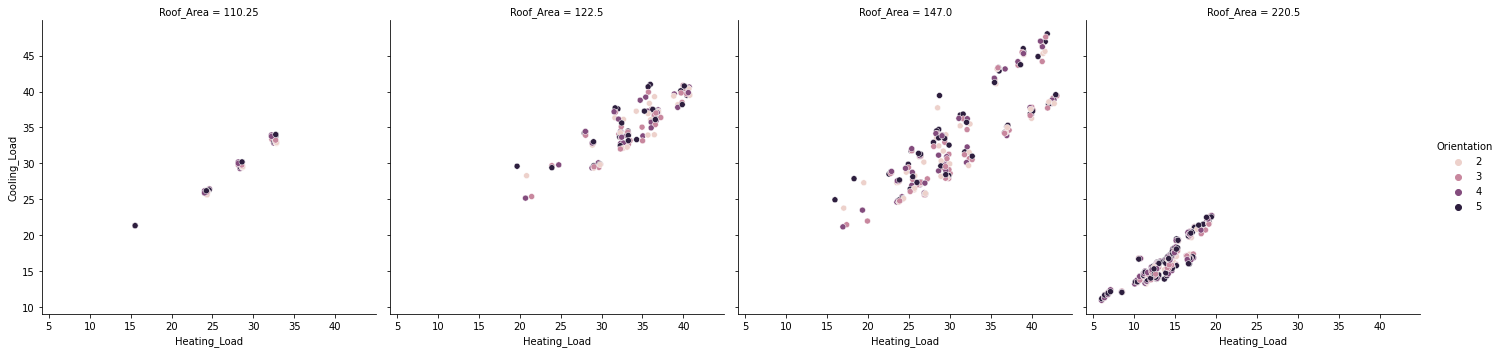

In [ ]:
sns.relplot(
    data=df, x="Heating_Load", y="Cooling_Load",
    col="Roof_Area", hue="Orientation",
    kind="scatter"
)

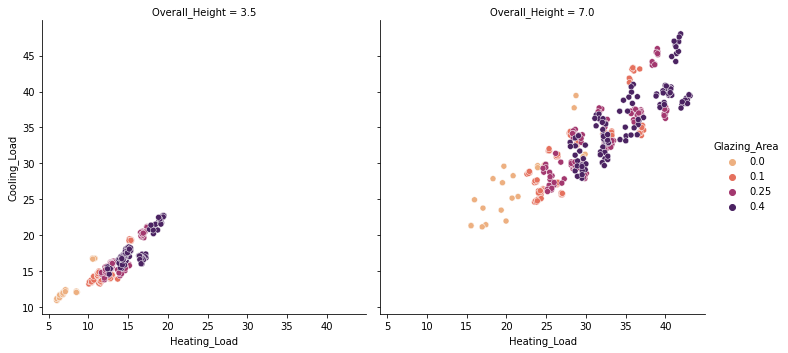

In [ ]:
sns.relplot(
    data=df, x="Heating_Load", y="Cooling_Load",
    col="Overall_Height", hue="Glazing_Area", palette = "flare", kind = "scatter"
)

#Ridge Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

#Data splitting and scaling

In [ ]:
features = df.columns[0:7]
target = df.columns[8:9]

#X and y values
X = df[features].values
y = df[target].values

from sklearn.model_selection import train_test_split
#splot
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (537, 7)
The dimension of X_test is (231, 7)


In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha = 8)  #alpha can be canged (we can optimize to reduce error)

ridgeReg.fit(X_train,y_train)

#train and test scorefor rridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\n\nRidge Model \n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))



Ridge Model 

The train score for ridge model is 0.9122234728492367
The test score for ridge model is 0.9125914393039551


#Lasso Regression

In [ ]:
#lasso regression model (l1 regularization)

lasso = Lasso(alpha = 0)
lasso.fit(X_train,y_train)
train_score_ls = lasso.score(X_train, y_train)
test_score_ls = lasso.score(X_test,y_test)

print("\nLasso model\n")
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso model

The train score for ls model is 0.9146081536479443
The test score for ls model is 0.915441034217831


<ipython-input-16-0e787a5f3ba2>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.346e+03, tolerance: 5.495e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
